In [2]:
import tensorflow as tf

In [3]:
X=tf.range(0,100,2)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98],
      dtype=int32)>

In [4]:
y=2*X+3
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([  3,   7,  11,  15,  19,  23,  27,  31,  35,  39,  43,  47,  51,
        55,  59,  63,  67,  71,  75,  79,  83,  87,  91,  95,  99, 103,
       107, 111, 115, 119, 123, 127, 131, 135, 139, 143, 147, 151, 155,
       159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 199], dtype=int32)>

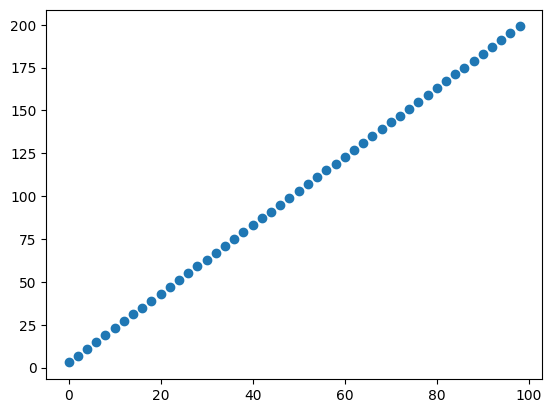

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show()

### Model Building

In [6]:
# create model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(32,input_shape=(1,)),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(lr=0.05),metrics=['mae'])

# train the model
model.fit(X,y, epochs=200)

Epoch 1/200
2/2 [==============================] - 2s 12ms/step - loss: 106.5587 - mae: 106.5587
Epoch 2/200
2/2 [==============================] - 0s 7ms/step - loss: 101.9164 - mae: 101.9164
Epoch 3/200
2/2 [==============================] - 0s 7ms/step - loss: 97.2532 - mae: 97.2533
Epoch 4/200
2/2 [==============================] - 0s 6ms/step - loss: 92.8299 - mae: 92.8299
Epoch 5/200
2/2 [==============================] - 0s 7ms/step - loss: 88.1560 - mae: 88.1560
Epoch 6/200
2/2 [==============================] - 0s 6ms/step - loss: 83.7621 - mae: 83.7621
Epoch 7/200
2/2 [==============================] - 0s 6ms/step - loss: 79.2450 - mae: 79.2450
Epoch 8/200
2/2 [==============================] - 0s 6ms/step - loss: 74.6756 - mae: 74.6756
Epoch 9/200
2/2 [==============================] - 0s 6ms/step - loss: 70.1180 - mae: 70.1180
Epoch 10/200
2/2 [==============================] - 0s 7ms/step - loss: 65.7073 - mae: 65.7073
Epoch 11/200
2/2 [==============================] - 0s

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 609 (2.38 KB)
Trainable params: 609 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.predict([150,-10])

1/1 [==============================] - 0s 115ms/step


array([[304.24948],
       [-17.05915]], dtype=float32)

In [9]:
X=-10
y=2*X+3
y

-17

### Save model using SavedModel format

In [10]:
model.save('/content/drive/MyDrive/Colab Notebooks/Example_DL/new_model_1')

### Save model using HDF5 format

In [16]:
model.save('/content/drive/MyDrive/Colab Notebooks/Example_DL/new_model_2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Load model using SavedModel format

In [12]:
import tensorflow as tf
new_model_1=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Example_DL/new_model_1')

In [13]:
new_model_1.predict([150,-10])

1/1 [==============================] - 0s 92ms/step


array([[304.24948],
       [-17.05915]], dtype=float32)

In [14]:
new_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 609 (2.38 KB)
Trainable params: 609 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Load model HDF5 format

In [17]:
import tensorflow as tf
new_model_2=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Example_DL/new_model_2.h5')

In [18]:
new_model_2.predict([150,-10])

1/1 [==============================] - 0s 61ms/step


array([[304.24948],
       [-17.05915]], dtype=float32)

In [20]:
new_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 609 (2.38 KB)
Trainable params: 609 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
